<a href="https://colab.research.google.com/github/Hitesh2411/FakeNewsDetection/blob/main/Fake%20News%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/news.csv')

In [ ]:
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
news_classes = df.label
news_classes.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], news_classes, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)

tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [ ]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy : {round(score*100, 2)}%')

Accuracy : 93.29%


In [ ]:
#conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

#conf_matrix_table = classification_report(y_test, y_pred, labels=['FAKE', 'REAL'])

#print(conf_matrix_table)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.69%


In [ ]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[590,  38],
       [ 42, 597]])

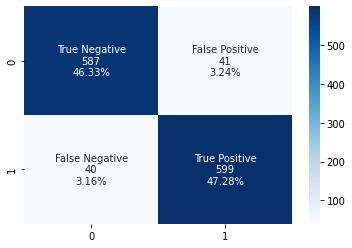

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')